In [ ]:
!pip install pandas
!pip install geopandas
!pip install matplotlib
!pip install rasterio
!pip install rasterstats

In [17]:
import geopandas as gpd
import rasterio
import rasterstats
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

<AxesSubplot: >

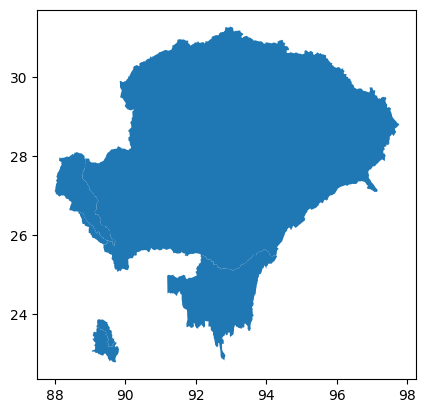

In [18]:
watershed = gpd.read_file(".\WaterShed\AG33_WS_Sord1_Stm_Faccu_Fdir_Fill_DEM_ASTERMV003.shp")
watershed.plot()

In [19]:
watershed

,Id,gridcode,Upazila,Area,geometry
0,1,13,Lalmonirhat Sadar,1652.248870,"POLYGON ((89.37819 25.77319, 89.35485 25.77735..."
1,2,14,Lalmonirhat Sadar,15408.721309,"POLYGON ((89.47903 25.86486, 89.47478 25.86979..."
2,3,16,Dewanganj & Bakshiganj,387123.127781,"POLYGON ((89.37819 25.77319, 89.43777 25.76824..."
3,4,15,Mohammadpur,1619.620792,"POLYGON ((89.19486 23.67403, 89.18977 23.67810..."
4,5,19,South Sunamganj & Jagannathpur,41427.273370,"POLYGON ((91.73403 23.75653, 91.73827 23.77979..."
5,6,18,Salikha,3870.227143,"POLYGON ((89.19486 23.67403, 89.24469 23.68161..."


In [20]:
watershed.loc[2]

Id                                                          3
gridcode                                                   16
Upazila                                Dewanganj & Bakshiganj
Area                                            387123.127781
geometry    POLYGON ((89.37819444444449 25.773194444444442...
Name: 2, dtype: object

In [21]:
type(watershed.loc[2])

pandas.core.series.Series

In [22]:
Dewanganj_df = pd.DataFrame(watershed.loc[2]).transpose()
Dewanganj_df

,Id,gridcode,Upazila,Area,geometry
2,3,16,Dewanganj & Bakshiganj,387123.127781,POLYGON ((89.37819444444449 25.773194444444442...


# Extration of Dewanganj River Watershed from shp file 

In [23]:
Dewanganj_poly = gpd.GeoDataFrame(Dewanganj_df, geometry = 'geometry')
Dewanganj_poly
type (Dewanganj_poly)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

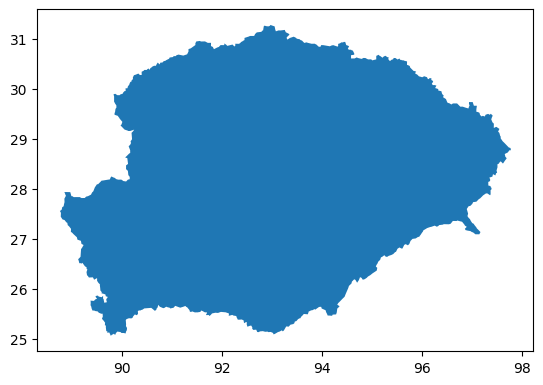

In [24]:
Dewanganj_poly.plot()

In [25]:
# Coordinate Reference System

In [ ]:
watershed.crs

In [27]:
Dewanganj_poly.crs = watershed.crs
Dewanganj_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#Creating empty panda data frame
data = pd.DataFrame('', columns=['Month', 'Rainfall'], index = np.arange(1,12))
data

In [ ]:
# Reading the information from the rainfall rasters
i = 0
for rast in os.listdir('.\Dewanganj_RF'):
    if rast.endswith('.tif'):
        rf = rasterio.open(f'./Dewanganj_RF/{rast}')
        rainfall_array = rf.read(1)
        affine = rf.transform
        
        sum_rf = rasterstats.zonal_stats(Dewanganj_poly, rainfall_array, affine=affine, stats=['sum'], geojson=True, nodata=rf.nodata)
        sum_rf = sum_rf[0]['sum']
        data.iloc[i]['Month'] = rast[:-4]
        data.iloc[i]['Rainfall'] = sum_rf

        i = i + 1
        print(sum_rf)

In [33]:
data

,Month,Rainfall
1,01-2022,11720.875008
2,02-2022,33800.532235
3,03-2022,34724.75801
4,04-2022,189851.945865
5,05-2022,113456.278153
6,06-2022,202649.652599
7,07-2022,119186.492803
8,08-2022,93900.369668
9,09-2022,96324.212885
10,10-2022,61924.91802


In [45]:
# Visualization with matplotlib

In [47]:
data ['Month'] = pd.to_datetime(data['Month'], infer_datetime_format = True)
data ['Month'] = data['Month'].dt.month
data = data.sort_values(by = 'Month')

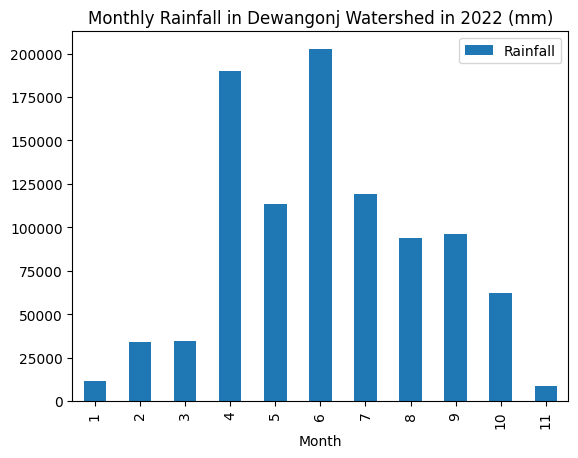

In [56]:
fig, (ax1) = plt.subplots(1)
data.plot(x = 'Month', y = 'Rainfall', kind = 'bar', ax=ax1, title = 'Monthly Rainfall in Dewangonj Watershed in 2022 (mm)')
plt.show()